In [1]:
import tensorflow as tf
print(tf.__version__)

2024-09-02 09:14:52.409341: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-02 09:14:52.410713: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-02 09:14:52.415643: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-02 09:14:52.429094: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-02 09:14:52.453479: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

2.17.0


In [2]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [3]:
t = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
tensor = tf.constant(t)

In [4]:
print(tensor)
print(tf.shape(tensor)) # 함수의 모양
print(tf.rank(tensor)) # 랭크를 봄
print(tf.size(tensor)) # 1차원

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10 11 12], shape=(12,), dtype=int32)
tf.Tensor([12], shape=(1,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)


In [5]:
# 텐서와 리스트의 차이
t1 = [1, 2, 3]
t2 = [3, 4, 5]
print(t1 + t2)
t1 = tf.constant(t1)
t2 = tf.constant(t2)
print(t1 + t2)

[1, 2, 3, 3, 4, 5]
tf.Tensor([4 6 8], shape=(3,), dtype=int32)


In [7]:
tensor2d = tf.reshape(tensor, [3,4]) # tensor의 모양을 바꾸는 reshape # == tensor.reshape([3,4])
print(tensor2d)
print(tensor2d.shape) # == tf.shape(tensor2d)

tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32)
(3, 4)


In [9]:
print(tensor2d[1])
print(tensor2d[1, 2])

tf.Tensor([5 6 7 8], shape=(4,), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)


In [11]:
tensor3d = tf.reshape(tensor, [3, 2, 2])
print(tensor3d)
print(tensor3d.shape)

tf.Tensor(
[[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]], shape=(3, 2, 2), dtype=int32)
(3, 2, 2)


In [16]:
x = tf.constant([1, 0, -1, 1])
print(x.shape)
tensor3d = tf.reshape(tensor,[1, 3, 4])
print(tensor3d.shape)

(4,)
(1, 3, 4)


In [18]:
print(tensor3d.shape)
tensor3d = tf.squeeze(tensor3d)
print(tensor3d.shape)

(1, 3, 4)
(3, 4)


In [21]:
print(x.shape) #(4) -> (4,1) 로 바꿔야 한다.
x_0 = tf.expand_dims(x,0)
x_1 = tf.expand_dims(x,1)
print(x_0.shape)
print(x_1.shape)

(4,)
(1, 4)
(4, 1)


In [22]:
tf.matmul(tensor3d, x_1) # == tensor3d@x_1 @는 무슨 약어인듯? (3, 4) * (4, 1) -> (3,1) 순서를 바꾸면 안된다?

<tf.Tensor: shape=(3, 1), dtype=int32, numpy=
array([[ 2],
       [ 6],
       [10]], dtype=int32)>

In [24]:
# t1.reduce_sum, reduce_mean
mat = tf.constant([[1., 2.], [3., 4.]])
sum = tf.reduce_sum(mat)
mean = tf.reduce_mean(mat)
print(sum, mean)

# [1, 2]
# [3, 4]
print(tf.reduce_sum(mat, 0))
print(tf.reduce_sum(mat, 1))

tf.Tensor(10.0, shape=(), dtype=float32) tf.Tensor(2.5, shape=(), dtype=float32)
tf.Tensor([4. 6.], shape=(2,), dtype=float32)
tf.Tensor([3. 7.], shape=(2,), dtype=float32)


In [25]:
## 그레디언트
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [27]:
def plot_graph(X, Y, X_hat = None, Y_hat = None, str_title = None):
    fig = plt.figure(figsize = (8, 6))
    if str_title is not None:
        plt.title(str_title, fontsize = 20, pad = 20)
    plt.plot(X, Y, ls = 'none', marker = 'o')
    if X_hat is not None and Y_hat is not None:
        plt.plot(X_hat, Y_hat)
    plt.tick_params(axis = 'both', labelsize = 14)

In [29]:
x_0 = tf.random.normal([20], 3, 1)
y_0 = tf.zeros([20])
x_1 = tf.random.normal([20], 5, 5, 1)
y_1 = tf.ones([20])

In [31]:
print(x_0, y_0, x_1, y_1)

tf.Tensor(
[2.5429878 2.5931327 3.7285776 2.1070223 3.3126116 3.9942925 1.2157376
 2.477995  3.9808004 2.324015  4.1456146 3.2060726 2.8027837 3.5380936
 3.76433   2.1638083 3.3361416 4.5602016 3.7227836 4.0754886], shape=(20,), dtype=float32) tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(20,), dtype=float32) tf.Tensor(
[13.470083    5.598466   -0.7923002   5.86302     1.4275184   8.448003
 -0.45407963 -0.9325514  -1.5109396  11.12001     5.114802   -0.9505806
 -7.1703806  -0.1973157   9.626237    6.255021   10.948628    7.4005356
  5.6007566   1.3755388 ], shape=(20,), dtype=float32) tf.Tensor([1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(20,), dtype=float32)


(40,) (40,)


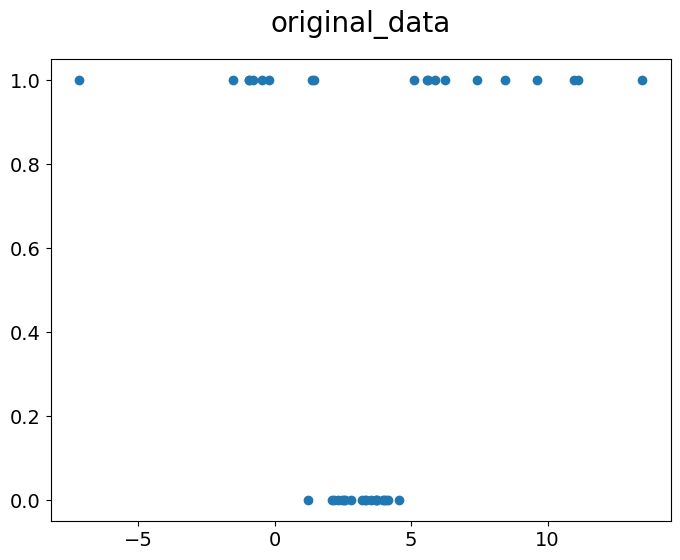

In [32]:
x = tf.concat([x_0, x_1], 0)
y = tf.concat([y_0, y_1], 0)
print(x.shape, y.shape)
plot_graph(x, y, str_title = 'original_data')

In [46]:
def corss_entropy(x, y, w, b):
    y_pred = tf.sigmoid(x * w + b)
    return -tf.reduce_sum(y*tf.math.log(y_pred) + (1-y) * tf.math.log(1-y_pred))

def cal_gradient(x, y, w, b):
    b_gradient = 0
    w_gradient = 0
    N = tf.shape(x)[0] # data number [40] (40, ~~)
    for i in range(0, N):
        x_i = x[i]
        y_i = y[i]
        y_pred = tf.sigmoid(x_i * w + b)
        
        df_df1 = -(y_i - y_pred) / (y_pred * (1 - y_pred))
        df_df2 = df_df1 * (y_pred) * (1 - y_pred)
        
        b_gradient += df_df2
        w_gradient += df_df2 * x_i
    return [w_gradient, b_gradient]

def apply_gradient(gradients, parameters, learning_rate):
    [w_g, b_g] = gradients
    [w, b] = parameters
    
    
    w = w - learning_rate * w_g
    b = b - learning_rate * b_g
    
    return [w, b]

def run_opt(x, y, w, b, learning_rate):
    gradients = cal_gradient(x, y, w, b)
    return apply_gradient(gradients, [w, b], learning_rate)
    
w = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))
b = tf.Variable(tf.random_normal_initializer(stddev=1)([1])) 

learning_rate = 0.005
training_steps = 2000
display_step = 200
    
for step in range(training_steps):
    [w_new, b_new] = run_opt(x, y, w, b, learning_rate)
    w = w_new
    b = b_new
    if step%display_step == 0:
        loss = corss_entropy(x, y, w, b)
        print("step:", step, ", loss:", loss.numpy(), ", w:", w.numpy(), ", b:", b.numpy())

step: 0 , loss: 31.993496 , w: [0.35568562] , b: [-1.205982]
step: 200 , loss: 27.478897 , w: [0.06094928] , b: [-0.22278886]
step: 400 , loss: 27.478752 , w: [0.05990824] , b: [-0.21525966]
step: 600 , loss: 27.47875 , w: [0.05990146] , b: [-0.21521102]
step: 800 , loss: 27.47875 , w: [0.05990146] , b: [-0.21521102]
step: 1000 , loss: 27.47875 , w: [0.05990146] , b: [-0.21521102]
step: 1200 , loss: 27.47875 , w: [0.05990146] , b: [-0.21521102]
step: 1400 , loss: 27.47875 , w: [0.05990146] , b: [-0.21521102]
step: 1600 , loss: 27.47875 , w: [0.05990146] , b: [-0.21521102]
step: 1800 , loss: 27.47875 , w: [0.05990146] , b: [-0.21521102]


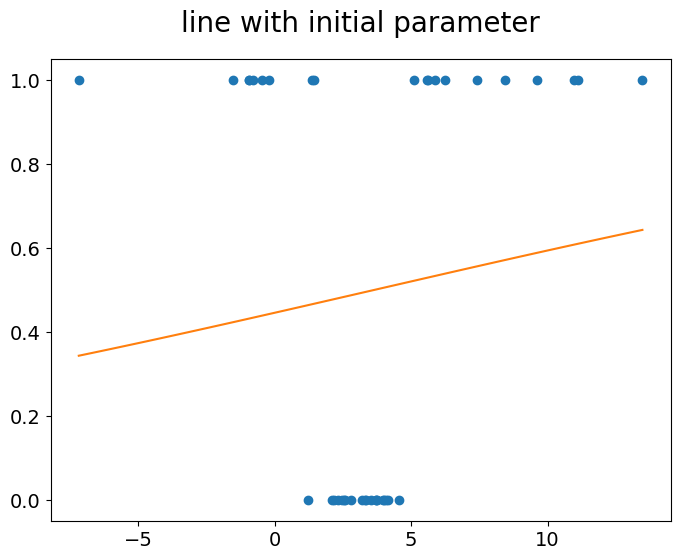

In [50]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x, y, x_fl, tf.sigmoid(w * x_fl + b), str_title="line with initial parameter")